<a href="https://colab.research.google.com/github/25071983/DESAFIO-PYTHON/blob/main/Challenge_ONE_Data_Science_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
from pandas import json_normalize



# 📌 Extracción(E - Extract)

In [93]:
df = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 🔧 Transformación (T - Transform)

## Conocer el conjunto de datos

In [94]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [95]:
df.shape

(7267, 6)

In [96]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## Normalizar columna customer

In [98]:
df.loc[0, 'customer']

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [99]:

# Normaliza la columna 'customer' (crea un nuevo DataFrame con las claves del JSON como columnas)
customer_df = json_normalize(df['customer'])


In [100]:
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [101]:
# Combina el DataFrame original con el nuevo DataFrame normalizado
df = df.join(customer_df)



In [102]:
df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7267 non-null   object
 1   Churn          7267 non-null   object
 2   customer       7267 non-null   object
 3   phone          7267 non-null   object
 4   internet       7267 non-null   object
 5   account        7267 non-null   object
 6   gender         7267 non-null   object
 7   SeniorCitizen  7267 non-null   int64 
 8   Partner        7267 non-null   object
 9   Dependents     7267 non-null   object
 10  tenure         7267 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 624.6+ KB


In [104]:
df['Partner'] = df['Partner'].astype('string')
df['Dependents'] = df['Dependents'].astype('string')
df['gender'] = df['gender'].astype('string')

## Normalizar columna phone

In [105]:
df.loc[0, 'phone']


{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [106]:
# Normaliza la columna 'phone' (crea un nuevo DataFrame con las claves del JSON como columnas)
phone_df = json_normalize(df['phone'])


In [107]:
phone_df.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [108]:
# Combina el DataFrame original con el nuevo DataFrame normalizado
df = df.join(phone_df)

In [109]:
df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7267 non-null   object
 1   Churn          7267 non-null   object
 2   customer       7267 non-null   object
 3   phone          7267 non-null   object
 4   internet       7267 non-null   object
 5   account        7267 non-null   object
 6   gender         7267 non-null   string
 7   SeniorCitizen  7267 non-null   int64 
 8   Partner        7267 non-null   string
 9   Dependents     7267 non-null   string
 10  tenure         7267 non-null   int64 
 11  PhoneService   7267 non-null   object
 12  MultipleLines  7267 non-null   object
dtypes: int64(2), object(8), string(3)
memory usage: 738.2+ KB


In [111]:
df['PhoneService'] = df['PhoneService'].astype('string')
df['MultipleLines'] = df['MultipleLines'].astype('string')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7267 non-null   object
 1   Churn          7267 non-null   object
 2   customer       7267 non-null   object
 3   phone          7267 non-null   object
 4   internet       7267 non-null   object
 5   account        7267 non-null   object
 6   gender         7267 non-null   string
 7   SeniorCitizen  7267 non-null   int64 
 8   Partner        7267 non-null   string
 9   Dependents     7267 non-null   string
 10  tenure         7267 non-null   int64 
 11  PhoneService   7267 non-null   string
 12  MultipleLines  7267 non-null   string
dtypes: int64(2), object(6), string(5)
memory usage: 738.2+ KB


## Normaliza columna internet

In [113]:
df.loc[0,'internet']

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [114]:
# Normaliza la columna 'internet' (crea un nuevo DataFrame con las claves del JSON como columnas)
internet_df = json_normalize(df['internet'])


In [115]:
internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [116]:
df = df.join(internet_df)

In [117]:
df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   customer          7267 non-null   object
 3   phone             7267 non-null   object
 4   internet          7267 non-null   object
 5   account           7267 non-null   object
 6   gender            7267 non-null   string
 7   SeniorCitizen     7267 non-null   int64 
 8   Partner           7267 non-null   string
 9   Dependents        7267 non-null   string
 10  tenure            7267 non-null   int64 
 11  PhoneService      7267 non-null   string
 12  MultipleLines     7267 non-null   string
 13  InternetService   7267 non-null   object
 14  OnlineSecurity    7267 non-null   object
 15  OnlineBackup      7267 non-null   object
 16  DeviceProtection  7267 non-null   object
 17  TechSupport   

In [119]:
df['InternetService'] = df['InternetService'].astype('string')
df['OnlineSecurity'] = df['OnlineSecurity'].astype('string')
df['OnlineBackup'] = df['OnlineBackup'].astype('string')
df['DeviceProtection'] = df['DeviceProtection'].astype('string')
df['TechSupport'] = df['TechSupport'].astype('string')
df['StreamingTV'] = df['StreamingTV'].astype('string')
df['StreamingMovies'] = df['StreamingMovies'].astype('string')


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   customer          7267 non-null   object
 3   phone             7267 non-null   object
 4   internet          7267 non-null   object
 5   account           7267 non-null   object
 6   gender            7267 non-null   string
 7   SeniorCitizen     7267 non-null   int64 
 8   Partner           7267 non-null   string
 9   Dependents        7267 non-null   string
 10  tenure            7267 non-null   int64 
 11  PhoneService      7267 non-null   string
 12  MultipleLines     7267 non-null   string
 13  InternetService   7267 non-null   string
 14  OnlineSecurity    7267 non-null   string
 15  OnlineBackup      7267 non-null   string
 16  DeviceProtection  7267 non-null   string
 17  TechSupport   

## Normaliza columna account

In [121]:
df.loc[0,'account']

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [122]:
# Normaliza la columna 'internet' (crea un nuevo DataFrame con las claves del JSON como columnas)
account_df = json_normalize(df['account'])

In [123]:
account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [124]:
df = df.join(account_df)

In [125]:
df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   string 
 7   SeniorCitizen     7267 non-null   int64  
 8   Partner           7267 non-null   string 
 9   Dependents        7267 non-null   string 
 10  tenure            7267 non-null   int64  
 11  PhoneService      7267 non-null   string 
 12  MultipleLines     7267 non-null   string 
 13  InternetService   7267 non-null   string 
 14  OnlineSecurity    7267 non-null   string 
 15  OnlineBackup      7267 non-null   string 
 16  DeviceProtection  7267 non-null   string 


In [128]:
# Convierte la columna a numérico, convirtiendo valores inválidos en NaN
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [129]:
# reemplazar esos NaN con 0
df['Charges.Total'].fillna(0, inplace=True)


<ipython-input-129-8723122a778b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(0, inplace=True)


In [130]:
df['Contract'] = df['Contract'].astype('string')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('string')
df['PaymentMethod'] = df['PaymentMethod'].astype('string')
df['Charges.Total'] = df['Charges.Total'].astype('float64')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   string 
 7   SeniorCitizen     7267 non-null   int64  
 8   Partner           7267 non-null   string 
 9   Dependents        7267 non-null   string 
 10  tenure            7267 non-null   int64  
 11  PhoneService      7267 non-null   string 
 12  MultipleLines     7267 non-null   string 
 13  InternetService   7267 non-null   string 
 14  OnlineSecurity    7267 non-null   string 
 15  OnlineBackup      7267 non-null   string 
 16  DeviceProtection  7267 non-null   string 


## Comprobación de incoherencias en los datos

In [132]:
df['customerID'].is_unique


True

In [133]:
df['Churn'].is_unique

False

In [136]:
df.loc[0]

,0
customerID,0002-ORFBO
Churn,No
customer,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
phone,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
internet,"{'InternetService': 'DSL', 'OnlineSecurity': '..."
account,"{'Contract': 'One year', 'PaperlessBilling': '..."
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes


# Manejo de inconsistencias

## Estandarización y transformación de datos (opcional)

In [142]:
# renombrar una columna

df = df.rename(columns={'customerID':'CustomerId'})


In [170]:
df = df.rename(columns={'gender':'Gender'})

In [171]:
df.head()

,CustomerId,Churn,customer,phone,internet,account,Gender,SeniorCitizen,Partner,Dependents,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,1,Yes,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,1,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,1,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [144]:
df['gender'].value_counts()

,count
gender,
Male,3675
Female,3592


# Columna de cuentas diarias

In [145]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] /30


In [146]:
df.head()

,CustomerId,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


# Estandarización y transformación de datos (opcional)

In [149]:
# Verificar si todos los valores son "Sí" o "No"

valores_validos = ['Yes', 'No']
resultado = df['Churn'].isin(valores_validos).all()
print(resultado)


False


In [150]:
df[~df['Churn'].isin(['Yes', 'No'])]


,CustomerId,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
30,0047-ZHDTW,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,0,No,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,2.633333
75,0120-YZLQA,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,0.663333
96,0154-QYHJU,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Male,0,No,No,...,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,1.958333
98,0162-RZGMZ,,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,No,No,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,1.996667
175,0274-VVQOQ,,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '...",Male,1,Yes,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,3.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,...,No,No,No,No,One year,Yes,Mailed check,54.25,773.20,1.808333
7180,9872-RZQQB,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,0,Yes,No,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,1.355000
7211,9920-GNDMB,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,2.541667
7239,9955-RVWSC,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90,0.641667


In [151]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


la columna 'Churn' no puede ser covertida  en valores binarios (1 y 0) ya que contiene valores vacios.

In [154]:
df['Partner'].value_counts()

,count
Partner,
0,3749
1,3518


In [153]:
# convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})


In [155]:
df['Partner'].value_counts()

,count
Partner,
0,3749
1,3518


# Análisis Descriptivo

In [156]:
df.describe()

,SeniorCitizen,Partner,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,32.346498,64.720098,2277.182035,2.157337
std,0.369074,0.499782,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,1.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


In [158]:
df['Cuentas_Diarias'].mean()

np.float64(2.1573365900646757)

In [160]:
df['Cuentas_Diarias'].max()

3.9583333333333335

In [162]:
df['Cuentas_Diarias'].min()

0.6083333333333333

In [163]:
df['Cuentas_Diarias'].std()

1.0043190628555607

# Distribución de evasión

In [164]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


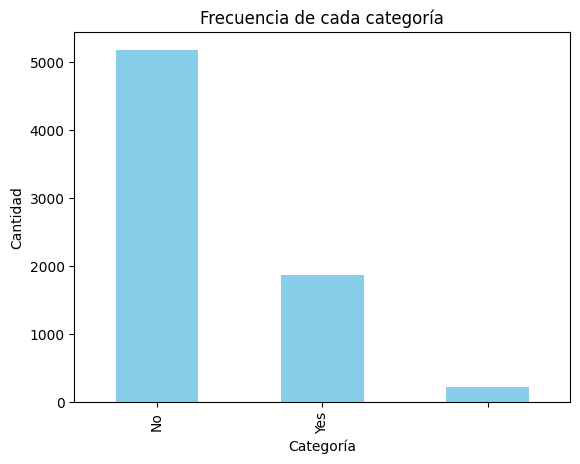

In [165]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de cada categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()


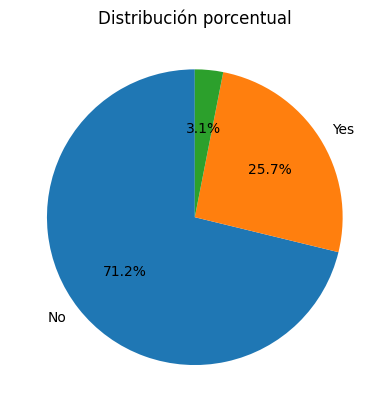

In [166]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución porcentual')
plt.ylabel('')  # Quitar etiqueta del eje Y
plt.show()


<ipython-input-167-165cacf7e13d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


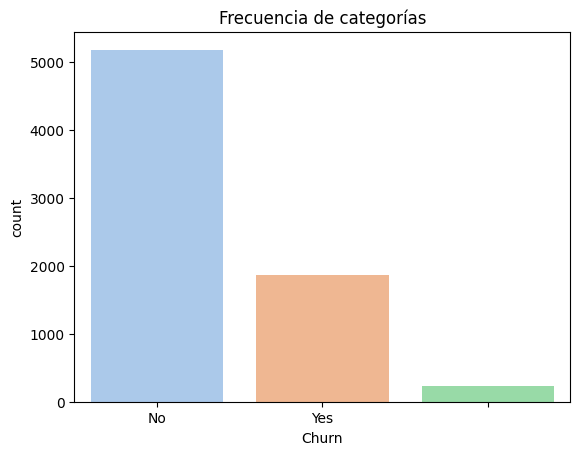

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Frecuencia de categorías')
plt.show()


# # Recuento de evasión por variables categóricas

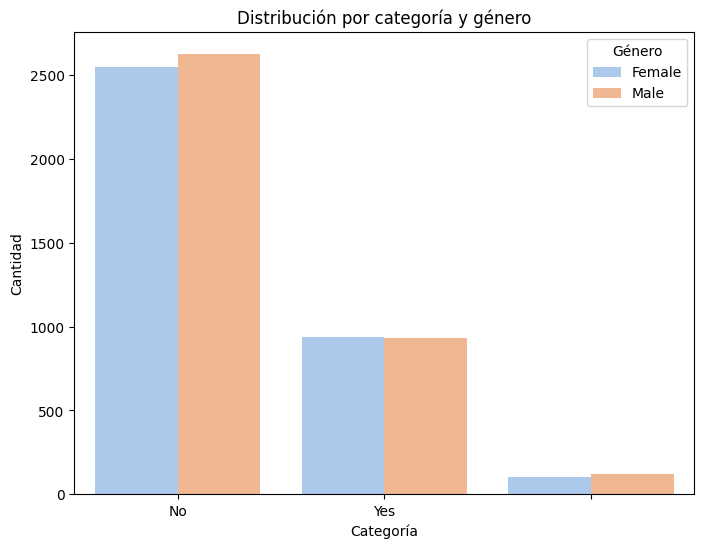

In [172]:
## Evasion por genero

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', hue='Gender', palette='pastel')
plt.title('Distribución por categoría y género')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.show()


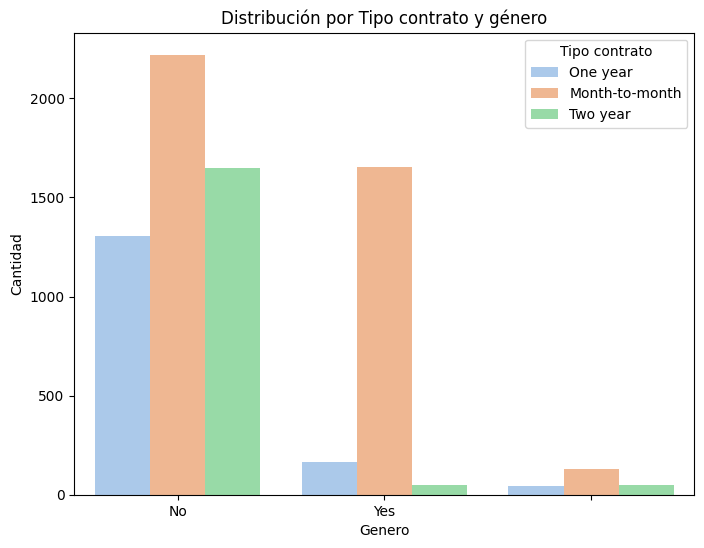

In [177]:
## Tipo contrato por genero

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', hue='Contract', palette='pastel')
plt.title('Distribución por Tipo contrato y género')
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.legend(title='Tipo contrato')
plt.show()

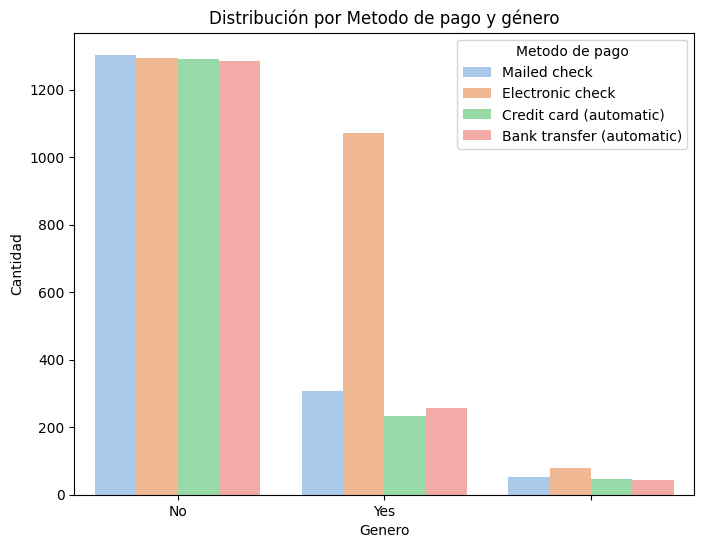

In [176]:
## Metodo de pago por genero

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', hue='PaymentMethod', palette='pastel')
plt.title('Distribución por Metodo de pago y género')
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.legend(title='Metodo de pago')
plt.show()

